## Differential Gene Expression

In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.2                         
year           2021                        
month          11                          
day            01                          
svn rev        81115                       
language       R                           
version.string R version 4.1.2 (2021-11-01)
nickname       Bird Hippie                 

In [2]:
# Check the library paths
# .libPaths()

In [3]:
# # Remove the extra single quote from the library paths
# .libPaths(c('/home/raotoo/R/x86_64-pc-linux-gnu-library/4.1', '/usr/local/lib/R/site-library', '/usr/lib/R/site-library', '/usr/lib/R/library'))

# # Install 'BiocManager'
# if (!requireNamespace("BiocManager", quietly = TRUE))
#   install.packages("BiocManager", dependencies = TRUE, lib = .libPaths()[1])

# # Install 'DESeq2' with force
# BiocManager::install("DESeq2", force = TRUE, lib = .libPaths()[1])

In [5]:
# # Check if 'DESeq2' is installed
# if (!requireNamespace("DESeq2", quietly = TRUE)) {
#   print("DESeq2 is not installed.")
# } else {
#   print("DESeq2 is installed.")
# }


In [6]:
# Create a user-specific library path
#user_lib <- file.path(Sys.getenv("HOME"), ".R/library")

# Install DESeq2 to the user-specific library
#BiocManager::install("DESeq2", lib = user_lib)


In [7]:
# Install BiocManager if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Use BiocManager to install Bioconductor packages
BiocManager::install("DESeq2")
BiocManager::install("ggplot2")
BiocManager::install("clusterProfiler")
BiocManager::install("biomaRt")
BiocManager::install("ReactomePA")
BiocManager::install("DOSE")
BiocManager::install("KEGG.db")
BiocManager::install("org.Mm.eg.db")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("pheatmap")
BiocManager::install("genefilter")
BiocManager::install("RColorBrewer")
BiocManager::install("GO.db")
BiocManager::install("topGO")
BiocManager::install("dplyr")
BiocManager::install("gage")
BiocManager::install("ggsci")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.22), R 4.1.2 (2021-11-01)

Installing package(s) 'DESeq2'

Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, foreign, KernSmooth, lattice, MASS,
    Matrix, mgcv, nlme, nnet, rpart, spatial, survival

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.22), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggplot2'”
Installation paths not writeable, unable to update packages
  path:

In [10]:
# Check if 'DESeq2' is installed
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  print("ggplot2 is not installed.")
} else {
  print("ggplot2 is installed.")
}


[1] "ggplot2 is installed."


## Import featureCounts output

In [11]:
setwd('/mnt/e/new_workflow/results/5_final_counts/')

In [13]:
# Import gene counts table
# - skip first row (general command info)
# - make row names the gene identifiers
countdata <- read.table("final_counts.txt", header = TRUE, skip = 1, row.names = 1)

# Remove .bam + '..' from column identifiers
colnames(countdata) <- gsub(".bam", "", colnames(countdata), fixed = T)
colnames(countdata) <- gsub(".bam", "", colnames(countdata), fixed = T)
colnames(countdata) <- gsub("..", "", colnames(countdata), fixed = T)

# Remove length/char columns
countdata <- countdata[ ,c(-1:-5)]

# Make sure ID's are correct
head(countdata)

countdata

,JvRad_Rhipp_504_TSMRLT_cfb7f9d5_P0330.SB0496_S10_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_503_TSMRLT_09cb4f24_P0330.SB0496_S9_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_402_TSMRLT_6615aec4_P0330.SB0496_S8_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_401_TSMRLT_6f156c58_P0330.SB0496_S7_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_400_TSMRLT_c5c04043_P0330.SB0496_S6_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_203_TSMRLT_e32edba2_P0330.SB0496_S4_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_202_TSMRLT_b3c033d6_P0330.SB0496_S3_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_201_TSMRLT_a429b07e_P0330.SB0496_S2_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_200_TSMRLT_d438483b_P0330.SB0496_S1_STAR_Aligned.sortedByCoord.out
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4933401J01Rik,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0
Xkr4,1,7,1,5,8,0,1,1,3
Gm18956,0,0,0,0,0,0,0,0,0
Gm37180,0,0,0,0,0,0,0,0,0
Gm37363,0,0,0,0,0,0,0,0,0


,JvRad_Rhipp_504_TSMRLT_cfb7f9d5_P0330.SB0496_S10_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_503_TSMRLT_09cb4f24_P0330.SB0496_S9_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_402_TSMRLT_6615aec4_P0330.SB0496_S8_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_401_TSMRLT_6f156c58_P0330.SB0496_S7_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_400_TSMRLT_c5c04043_P0330.SB0496_S6_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_203_TSMRLT_e32edba2_P0330.SB0496_S4_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_202_TSMRLT_b3c033d6_P0330.SB0496_S3_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_201_TSMRLT_a429b07e_P0330.SB0496_S2_STAR_Aligned.sortedByCoord.out,JvRad_Rhipp_200_TSMRLT_d438483b_P0330.SB0496_S1_STAR_Aligned.sortedByCoord.out
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4933401J01Rik,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0
Xkr4,1,7,1,5,8,0,1,1,3
Gm18956,0,0,0,0,0,0,0,0,0
Gm37180,0,0,0,0,0,0,0,0,0
Gm37363,0,0,0,0,0,0,0,0,0
Gm37686,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0
Gm37329,0,0,0,0,0,0,0,0,0


In [14]:
colnames(countdata)

[1] "JvRad_Rhipp_504_TSMRLT_cfb7f9d5_P0330.SB0496_S10_STAR_Aligned.sortedByCoord.out"
[2] "JvRad_Rhipp_503_TSMRLT_09cb4f24_P0330.SB0496_S9_STAR_Aligned.sortedByCoord.out" 
[3] "JvRad_Rhipp_402_TSMRLT_6615aec4_P0330.SB0496_S8_STAR_Aligned.sortedByCoord.out" 
[4] "JvRad_Rhipp_401_TSMRLT_6f156c58_P0330.SB0496_S7_STAR_Aligned.sortedByCoord.out" 
[5] "JvRad_Rhipp_400_TSMRLT_c5c04043_P0330.SB0496_S6_STAR_Aligned.sortedByCoord.out" 
[6] "JvRad_Rhipp_203_TSMRLT_e32edba2_P0330.SB0496_S4_STAR_Aligned.sortedByCoord.out" 
[7] "JvRad_Rhipp_202_TSMRLT_b3c033d6_P0330.SB0496_S3_STAR_Aligned.sortedByCoord.out" 
[8] "JvRad_Rhipp_201_TSMRLT_a429b07e_P0330.SB0496_S2_STAR_Aligned.sortedByCoord.out" 
[9] "JvRad_Rhipp_200_TSMRLT_d438483b_P0330.SB0496_S1_STAR_Aligned.sortedByCoord.out"

In [23]:

# Import gene counts table
# - skip first row (general command info)
# - make row names the gene identifiers
countdata <- read.table("final_counts.txt", header = TRUE, skip = 1, row.names = 1)

# Extract the first 14 characters from the original column names
short_names <- substr(colnames(countdata), 1, 17)

# Remove leading ".." from the short names
short_names <- gsub("^\\.\\.", "", short_names)

# Rename columns using the cleaned short names
colnames(countdata) <- short_names

# Remove length/char columns
countdata <- countdata[, -c(1:5)]

# Make sure ID's are correct
head(countdata)

# Display the updated countdata
countdata

,JvRad_Rhipp_504,JvRad_Rhipp_503,JvRad_Rhipp_402,JvRad_Rhipp_401,JvRad_Rhipp_400,JvRad_Rhipp_203,JvRad_Rhipp_202,JvRad_Rhipp_201,JvRad_Rhipp_200
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4933401J01Rik,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0
Xkr4,1,7,1,5,8,0,1,1,3
Gm18956,0,0,0,0,0,0,0,0,0
Gm37180,0,0,0,0,0,0,0,0,0
Gm37363,0,0,0,0,0,0,0,0,0


,JvRad_Rhipp_504,JvRad_Rhipp_503,JvRad_Rhipp_402,JvRad_Rhipp_401,JvRad_Rhipp_400,JvRad_Rhipp_203,JvRad_Rhipp_202,JvRad_Rhipp_201,JvRad_Rhipp_200
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4933401J01Rik,0,0,0,0,0,0,0,0,0
Gm26206,0,0,0,0,0,0,0,0,0
Xkr4,1,7,1,5,8,0,1,1,3
Gm18956,0,0,0,0,0,0,0,0,0
Gm37180,0,0,0,0,0,0,0,0,0
Gm37363,0,0,0,0,0,0,0,0,0
Gm37686,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0
Gm37329,0,0,0,0,0,0,0,0,0


In [24]:
colnames(countdata)

[1] "JvRad_Rhipp_504" "JvRad_Rhipp_503" "JvRad_Rhipp_402" "JvRad_Rhipp_401"
[5] "JvRad_Rhipp_400" "JvRad_Rhipp_203" "JvRad_Rhipp_202" "JvRad_Rhipp_201"
[9] "JvRad_Rhipp_200"

In [25]:
# Import metadata file
# - make row names the matching sampleID's from the countdata
metadata <- read.delim("/mnt/e/new_workflow/example/metadata_2.txt", row.names = 1)

# Add sampleID's to the mapping file
metadata$sampleid <- row.names(metadata)

# Reorder sampleID's to match featureCounts column order. 
metadata <- metadata[match(colnames(countdata), metadata$sampleid), ]

# Make sure ID's are correct
head(metadata)

,Group,Replicate,sampleid
,<chr>,<chr>,<chr>
JvRad_Rhipp_504,sham,Rep1,JvRad_Rhipp_504
JvRad_Rhipp_503,sham,Rep2,JvRad_Rhipp_503
JvRad_Rhipp_402,sham,Rep3,JvRad_Rhipp_402
JvRad_Rhipp_401,sham,Rep4,JvRad_Rhipp_401
JvRad_Rhipp_400,sham,Rep5,JvRad_Rhipp_400
JvRad_Rhipp_203,ir,Rep1,JvRad_Rhipp_203


## Make DESeq2 object from counts and metadata

In [29]:
library(DESeq2)
# - countData : count dataframe
# - colData : sample metadata in the dataframe with row names as sampleID's
# - design : The design of the comparisons to use. 
#            Use (~) before the name of the column variable to compare
ddsMat <- DESeqDataSetFromMatrix(countData = countdata,
                                 colData = metadata,
                                 design = ~Group)


# Find differential expressed genes
ddsMat <- DESeq(ddsMat)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



## Get basic statisics about the number of significant genes

In [30]:
# Get results from testing with FDR adjust pvalues
results <- results(ddsMat, pAdjustMethod = "fdr", alpha = 0.05)

# Generate summary of testing. 
summary(results)


out of 24175 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 105, 0.43%
LFC < 0 (down)     : 484, 2%
outliers [1]       : 0, 0%
low counts [2]     : 12188, 50%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [31]:
# Check directionality of the log2 fold changes
## Log2 fold change is set as (LoGlu / HiGlu)
## Postive fold changes = Increased in LoGlu
## Negative fold changes = Decreased in LoGlu
mcols(results, use.names = T)

DataFrame with 6 rows and 2 columns
                       type            description
                <character>            <character>
baseMean       intermediate mean of normalized c..
log2FoldChange      results log2 fold change (ML..
lfcSE               results standard error: Grou..
stat                results Wald statistic: Grou..
pvalue              results Wald test p-value: G..
padj                results  fdr adjusted p-values

## Step 8. Annotate gene symbols

In [32]:
# Mouse genome database (Select the correct one)
library(org.Mm.eg.db) 

# Add gene full name
results$description <- mapIds(x = org.Mm.eg.db,
                              keys = row.names(results),
                              column = "GENENAME",
                              keytype = "SYMBOL",
                              multiVals = "first")

# Add gene symbol
results$symbol <- row.names(results)

# Add ENTREZ ID
results$entrez <- mapIds(x = org.Mm.eg.db,
                         keys = row.names(results),
                         column = "ENTREZID",
                         keytype = "SYMBOL",
                         multiVals = "first")

# Add ENSEMBL
results$ensembl <- mapIds(x = org.Mm.eg.db,
                          keys = row.names(results),
                          column = "ENSEMBL",
                          keytype = "SYMBOL",
                          multiVals = "first")

# Subset for only significant genes (q < 0.05)
results_sig <- subset(results, padj < 0.05)
head(results_sig)

Loading required package: AnnotationDbi



'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



log2 fold change (MLE): Group sham vs ir 
Wald test p-value: Group sham vs ir 
DataFrame with 6 rows and 10 columns
            baseMean log2FoldChange     lfcSE      stat      pvalue        padj
           <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
Gm10566     13.37986      -1.787018  0.348195  -5.13223 2.86331e-07 3.69059e-05
Gm6060       5.91492      -1.700156  0.519168  -3.27477 1.05748e-03 2.77373e-02
Paqr8       39.07391       0.846439  0.230520   3.67187 2.40785e-04 8.88091e-03
Rims1       42.78374       0.837124  0.262958   3.18349 1.45510e-03 3.42677e-02
Tubb4b-ps2 173.54765      -1.267812  0.201967  -6.27732 3.44458e-10 9.17559e-08
Gm28439    134.35701      -0.765258  0.186942  -4.09356 4.24792e-05 2.32481e-03
                      description      symbol      entrez            ensembl
                      <character> <character> <character>        <character>
Gm10566    glyceraldehyde-3-pho..     Gm10566   100039959 ENSMUSG00000073737
Gm6060     pe

In [33]:
# Write normalized gene counts to a .txt file
write.table(x = as.data.frame(counts(ddsMat), normalized = T), 
            file = 'normalized_counts.txt', 
            sep = '\t', 
            quote = F,
            col.names = NA)

# Write significant normalized gene counts to a .txt file
write.table(x = counts(ddsMat[row.names(results_sig)], normalized = T), 
            file = 'normalized_counts_significant.txt', 
            sep = '\t', 
            quote = F, 
            col.names = NA)

# Write the annotated results table to a .txt file
write.table(x = as.data.frame(results), 
            file = "results_gene_annotated.txt", 
            sep = '\t', 
            quote = F,
            col.names = NA)

# Write significant annotated results table to a .txt file
write.table(x = as.data.frame(results_sig), 
            file = "results_gene_annotated_significant.txt", 
            sep = '\t', 
            quote = F,
            col.names = NA)

## Step 9. Plotting Gene Expression Data

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


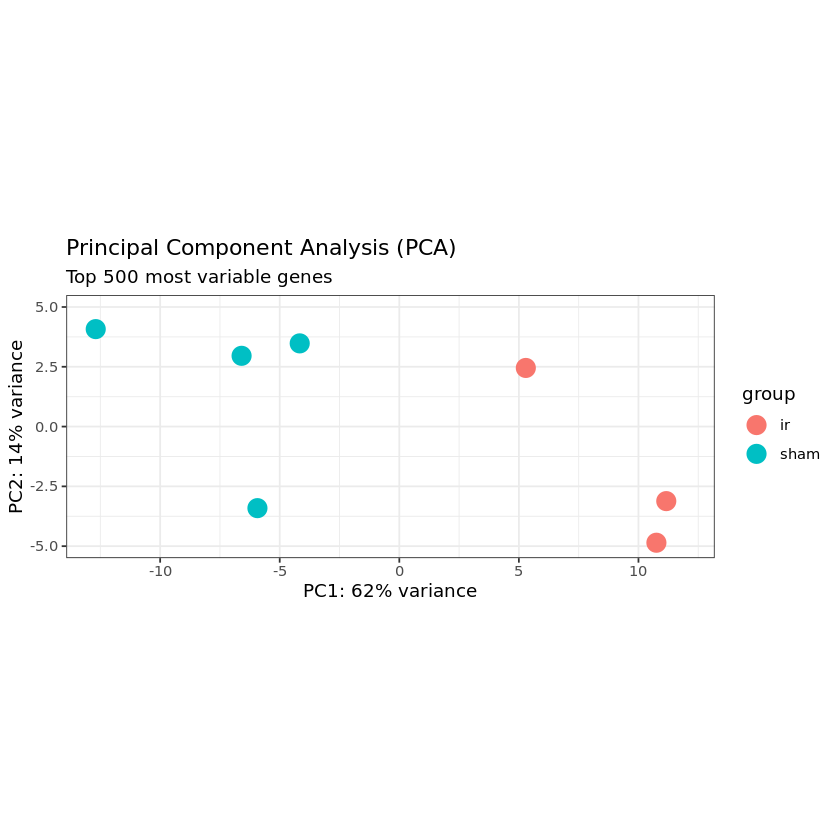

In [36]:
library("ggplot2")

# Convert all samples to rlog
ddsMat_rlog <- rlog(ddsMat, blind = FALSE)

# Plot PCA by column variable
plotPCA(ddsMat_rlog, intgroup = "Group", ntop = 500) +
  theme_bw() + # remove default ggplot2 theme
  geom_point(size = 5) + # Increase point size
  scale_y_continuous(limits = c(-5, 5)) + # change limits to fix figure dimensions
  ggtitle(label = "Principal Component Analysis (PCA)", 
          subtitle = "Top 500 most variable genes") 

## 9b. Heatmap

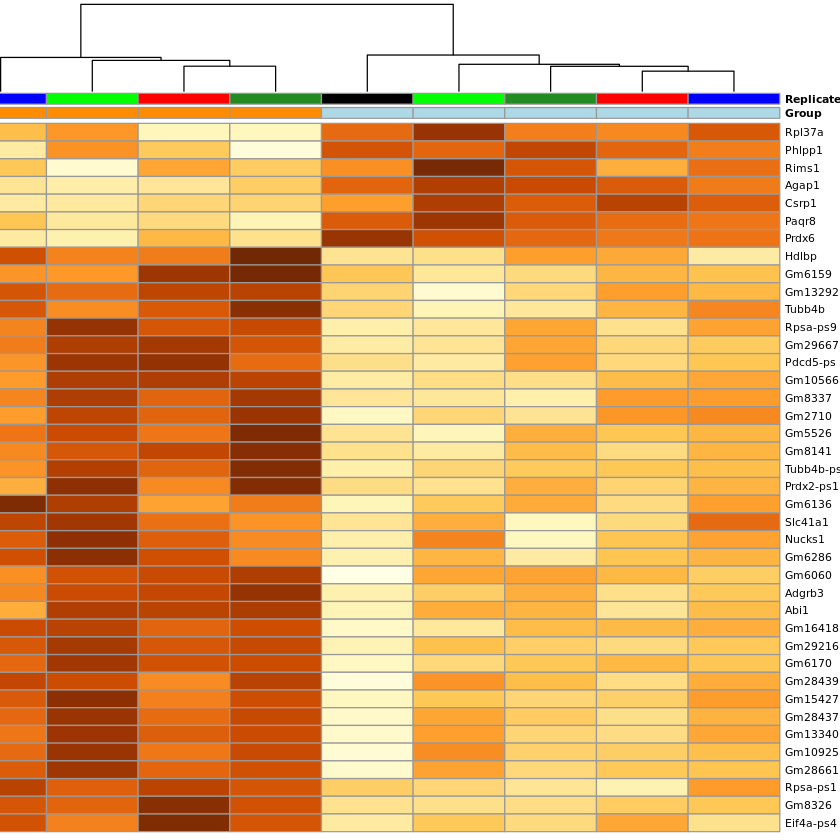

In [79]:
library("pheatmap")
library("RColorBrewer")

# Convert all samples to rlog
ddsMat_rlog <- rlog(ddsMat, blind = FALSE)

# Gather 30 significant genes and make matrix
mat <- assay(ddsMat_rlog[row.names(results_sig)])[1:40, ]

# Choose which column variables you want to annotate the columns by.
annotation_col = data.frame(
  Group = factor(colData(ddsMat_rlog)$Group), 
  Replicate = factor(colData(ddsMat_rlog)$Replicate),
  row.names = colData(ddsMat_rlog)$sampleid
)

# Specify colors you want to annotate the columns by.
ann_colors = list(
  Group = c(sham = "lightblue", ir = "darkorange"),
  Replicate = c(Rep1 = "red", Rep2 = "green",Rep3 = "blue",Rep4 = "forestgreen",Rep5 = "black")
)

# Make Heatmap with pheatmap function.
## See more in documentation for customization
pheatmap(mat = mat, 
         color = colorRampPalette(brewer.pal(9, "YlOrBr"))(255), 
         scale = "row", # Scale genes to Z-score (how many standard deviations)
         annotation_col = annotation_col, # Add multiple annotations to the samples
         annotation_colors = ann_colors,# Change the default colors of the annotations
         fontsize = 6.5, # Make fonts smaller
         cellwidth = 55, # Make the cells wider
         show_colnames = F)

## 9c. Volcano Plot

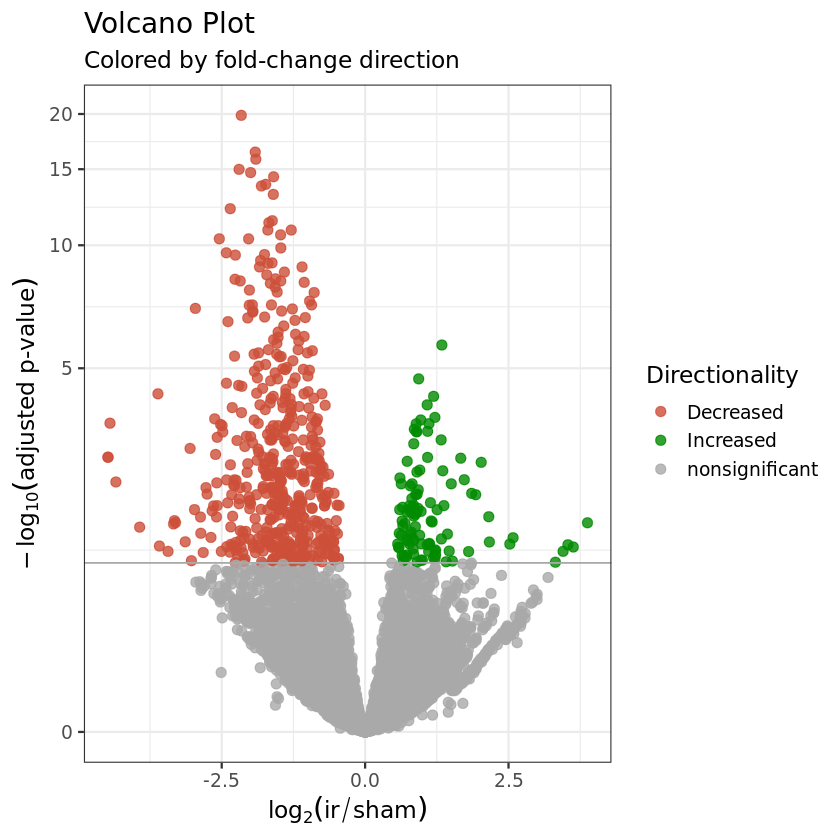

In [80]:
library("dplyr")

# Gather Log-fold change and FDR-corrected pvalues from DESeq2 results
## - Change pvalues to -log10 (1.3 = 0.05)
data <- data.frame(gene = row.names(results),
                   pval = -log10(results$padj), 
                   lfc = results$log2FoldChange)

# Remove any rows that have NA as an entry
data <- na.omit(data)

# Color the points which are up or down
## If fold-change > 0 and pvalue > 1.3 (Increased significant)
## If fold-change < 0 and pvalue > 1.3 (Decreased significant)
data <- mutate(data, color = case_when(data$lfc > 0 & data$pval > 1.3 ~ "Increased",
                                       data$lfc < 0 & data$pval > 1.3 ~ "Decreased",
                                       data$pval < 1.3 ~ "nonsignificant"))

# Make a basic ggplot2 object with x-y values
vol <- ggplot(data, aes(x = lfc, y = pval, color = color))

# Add ggplot2 layers
vol +   
  ggtitle(label = "Volcano Plot", subtitle = "Colored by fold-change direction") +
  geom_point(size = 2.5, alpha = 0.8, na.rm = T) +
  scale_color_manual(name = "Directionality",
                     values = c(Increased = "#008B00", Decreased = "#CD4F39", nonsignificant = "darkgray")) +
  theme_bw(base_size = 14) + # change overall theme
  theme(legend.position = "right") + # change the legend
  xlab(expression(log[2]("ir" / "sham"))) + # Change X-Axis label
  ylab(expression(-log[10]("adjusted p-value"))) + # Change Y-Axis label
  geom_hline(yintercept = 1.3, colour = "darkgrey") + # Add p-adj value cutoff line
  scale_y_continuous(trans = "log1p") # Scale yaxis due to large p-values

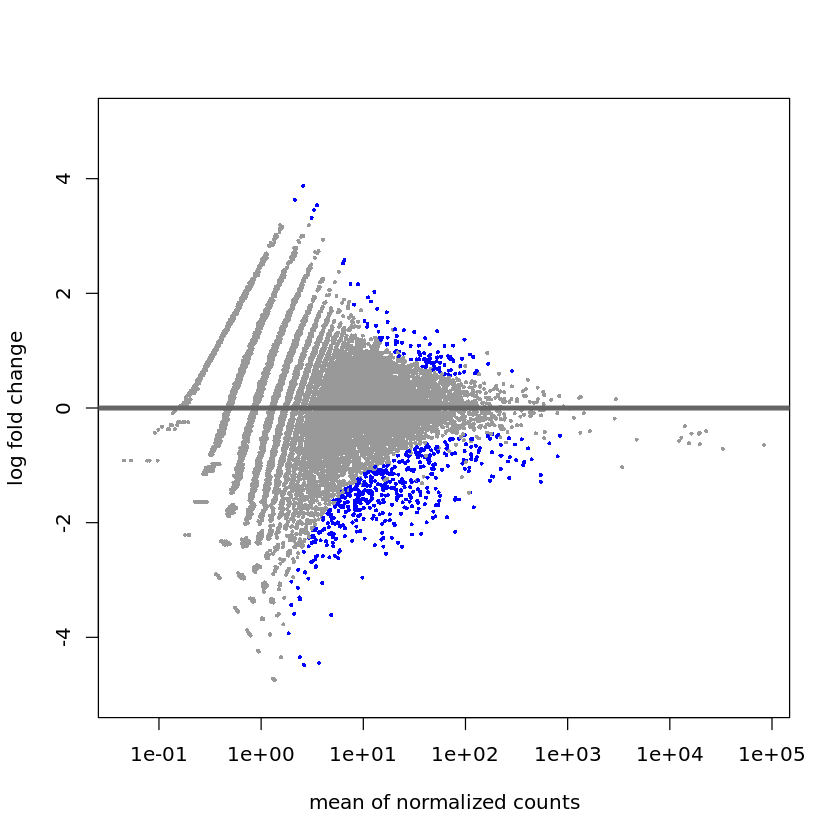

In [81]:
plotMA(results, ylim = c(-5, 5))

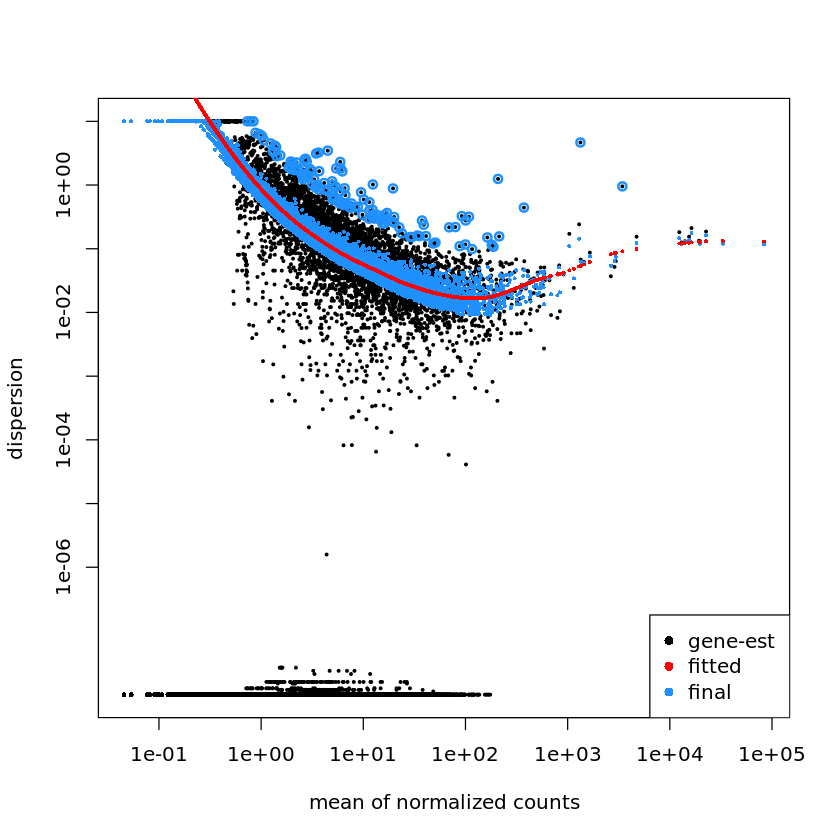

In [82]:
plotDispEsts(ddsMat)

## 9f. Single gene plot

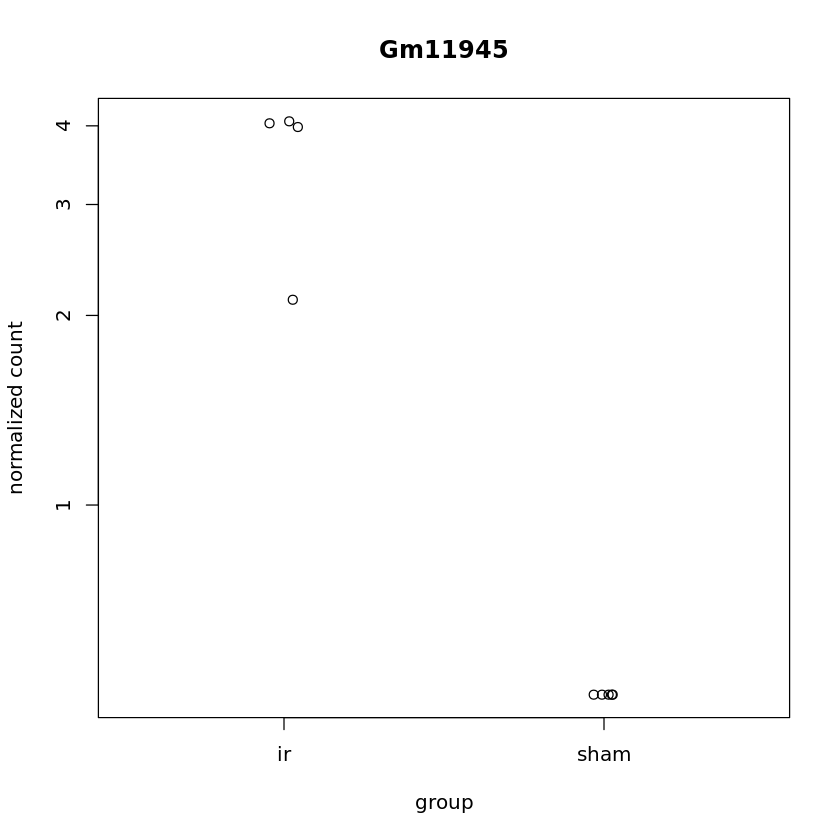

In [83]:
# Convert all samples to rlog
ddsMat_rlog <- rlog(ddsMat, blind = FALSE)

# Get gene with highest expression
top_gene <- rownames(results)[which.min(results$log2FoldChange)]

# Plot single gene
plotCounts(dds = ddsMat, 
           gene = top_gene, 
           intgroup = "Group", 
           normalized = T, 
           transform = T)

## Step 10. Finding Pathways from Differential Expressed Genes

In [84]:
# Remove any genes that do not have any entrez identifiers
results_sig_entrez <- subset(results_sig, is.na(entrez) == FALSE)

# Create a matrix of gene log2 fold changes
gene_matrix <- results_sig_entrez$log2FoldChange

# Add the entrezID's as names for each logFC entry
names(gene_matrix) <- results_sig_entrez$entrez

# View the format of the gene matrix
##- Names = ENTREZ ID
##- Values = Log2 Fold changes
head(gene_matrix)

100039959     606528      74229     116837     665829  100503946 
-1.7870183 -1.7001559  0.8464389  0.8371239 -1.2678118 -0.9418568

## 10b. Enrich genes using the KEGG database

In [70]:
# Install and load devtools (if not already installed)
if (!requireNamespace("devtools", quietly = TRUE)) {
  install.packages("devtools")
}

# Load devtools
library(devtools)

# Replace 'path/to/clusterProfiler.tar.gz' with the actual path to your 'clusterProfiler' source package
path_to_clusterprofiler_tar_gz <- "/mnt/e/clusterProfiler_4.10.0.tar.gz"

# Install the 'clusterProfiler' package from the local tar.gz file
devtools::install_local(path_to_clusterprofiler_tar_gz, force = TRUE)

# Load the 'clusterProfiler' library
library(clusterProfiler)

Installing package into ‘/home/raotoo/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘credentials’, ‘zip’, ‘gitcreds’, ‘httr2’, ‘ini’, ‘systemfonts’, ‘textshaping’, ‘clipr’, ‘gert’, ‘gh’, ‘rstudioapi’, ‘whisker’, ‘downlit’, ‘ragg’, ‘xml2’, ‘xopen’, ‘brew’, ‘usethis’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘rcmdcheck’, ‘remotes’, ‘roxygen2’, ‘rversions’, ‘sessioninfo’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘xml2’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘roxygen2’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘rversions’ had non-zero exit status”
Warning message

ERROR: Error in library(devtools): there is no package called ‘devtools’


In [72]:
library(clusterProfiler)

ERROR: Error in library(clusterProfiler): there is no package called ‘clusterProfiler’


In [73]:
library("clusterProfiler")
#library

kegg_enrich <- enrichKEGG(gene = names(gene_matrix),
                          organism = 'mouse',
                          pvalueCutoff = 0.05, 
                          qvalueCutoff = 0.10)

# Plot results
barplot(kegg_enrich, 
        drop = TRUE, 
        showCategory = 10, 
        title = "KEGG Enrichment Pathways",
        font.size = 8)

ERROR: Error in library("clusterProfiler"): there is no package called ‘clusterProfiler’


In [63]:
library("clusterProfiler")

go_enrich <- enrichGO(gene = names(gene_matrix),
                      OrgDb = 'org.Mm.eg.db', 
                      readable = T,
                      ont = "BP",
                      pvalueCutoff = 0.05, 
                      qvalueCutoff = 0.10)

# Plot results
barplot(go_enrich, 
        drop = TRUE, 
        showCategory = 10, 
        title = "GO Biological Pathways",
        font.size = 8)

ERROR: Error in library("enrichGO"): there is no package called ‘enrichGO’
